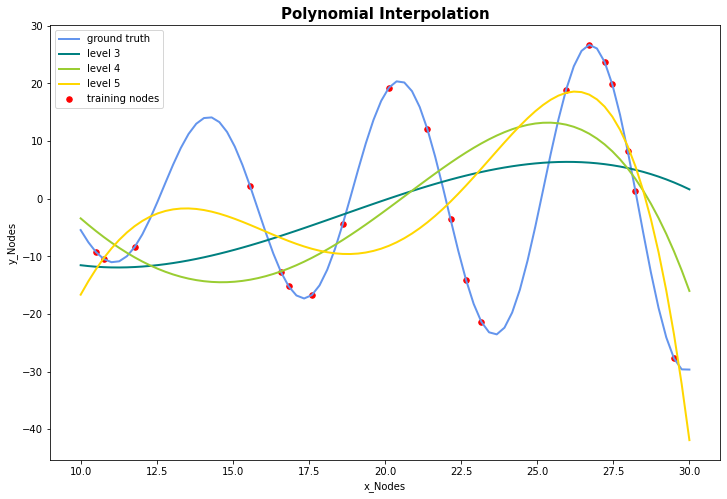

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

#rumus dari approximation interpolation formula
def f(x):
        return x * np.sin(x)

#menampilkan array minimum dari 30 sampai 60 , kita mengatur grafik 
#10 adalah titik y_nodes pertama
#30 adalah batas grafik yang ditampilan di frame
x_nodes = np.linspace(10, 30, 80)

# generate point and menyimpan subset ,generate points and keep a subset of them
x = np.linspace(10, 30, 80)
rng = np.random.RandomState(0)
rng.shuffle(x)

#menambah jumlah nodes yang ada
x = np.sort(x[:20])
y = f(x)

#mengatur size dari frame
fig = plt.figure(figsize=(12,8))

# membuat matrix dari arrays 
X_plot = x_nodes[:, np.newaxis]

#plot garis yang menyentuh semua titik
colors = ['teal', 'yellowgreen', 'gold']
plt.plot(x_nodes, f(x_nodes), color='cornflowerblue', linewidth=2, label="ground truth")
plt.scatter(x, y, color='red', s=30, marker='o', label="training nodes")

#enumerate menampilkan garis tambahan, dan dapat diubah sesuai kebutuhan
for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_nodes = model.predict(X_plot)
    plt.plot(x_nodes, y_nodes, color=colors[count], linewidth=2, label="level %d" % degree)
    
#menampilkan ornamen grafik 
plt.legend(loc='upper left')
plt.title('Polynomial Interpolation', fontdict={'fontsize':15,'fontweight':'bold'})
plt.xlabel('x_Nodes')
plt.ylabel('y_Nodes')
plt.show()